In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from datetime import datetime, timedelta
import nltk
from nltk.corpus import stopwords
import re 
from collections import Counter
import matplotlib.pyplot as plt
import re, pandas as pd
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

nltk.download('stopwords')


data = pd.read_json('data_cleaned_historia.json')
data_opinion = pd.read_json('data_cleaned_opinion.json')

[nltk_data] Downloading package stopwords to C:\Users\CYTech
[nltk_data]     Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data['date_parsed'] = pd.to_datetime(data['date_parsed'])
data_opinion['date_parsed'] = pd.to_datetime(data_opinion['date_parsed'])

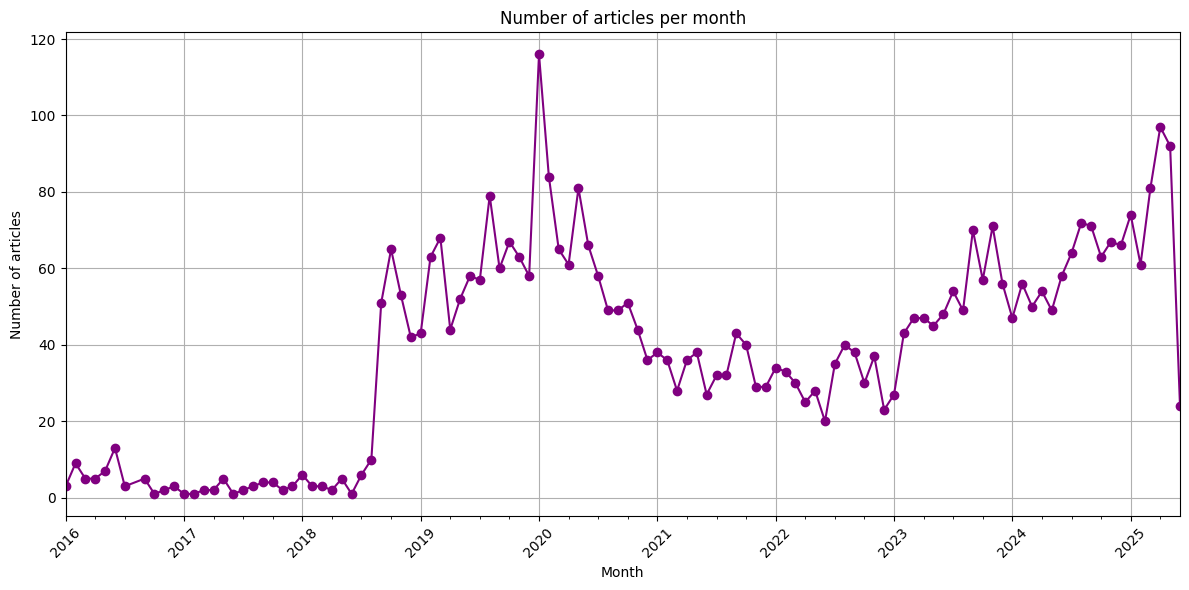

In [4]:
# Extraire l'année et le mois (format YYYY-MM)
data['year_month'] = data['date_parsed'].dt.to_period('M')

# Compter le nombre d'articles par mois
articles_per_month = data['year_month'].value_counts().sort_index()

# Tracer la courbe
plt.figure(figsize=(12, 6))
articles_per_month.plot(kind='line', marker='o', color='purple')
plt.title("Number of articles per month")
plt.xlabel("Month")
plt.ylabel("Number of articles")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

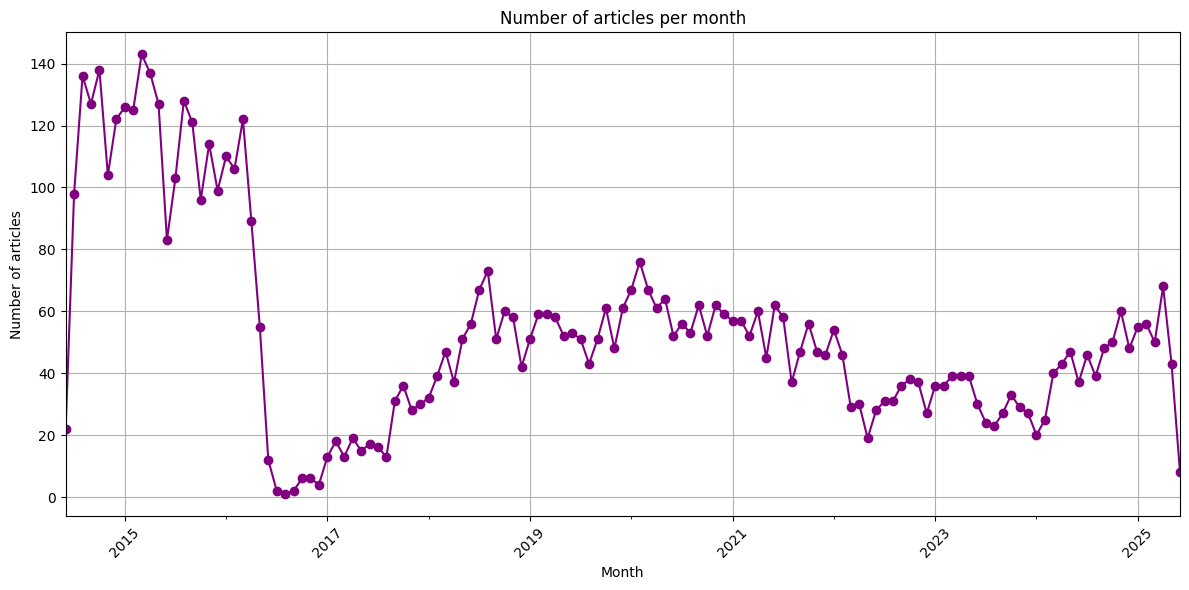

In [55]:
# Extraire l'année et le mois (format YYYY-MM)
data_opinion['year_month'] = data_opinion['date_parsed'].dt.to_period('M')

# Compter le nombre d'articles par mois
articles_per_month = data_opinion['year_month'].value_counts().sort_index()

# Tracer la courbe
plt.figure(figsize=(12, 6))
articles_per_month.plot(kind='line', marker='o', color='purple')
plt.title("Number of articles per month")
plt.xlabel("Month")
plt.ylabel("Number of articles")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

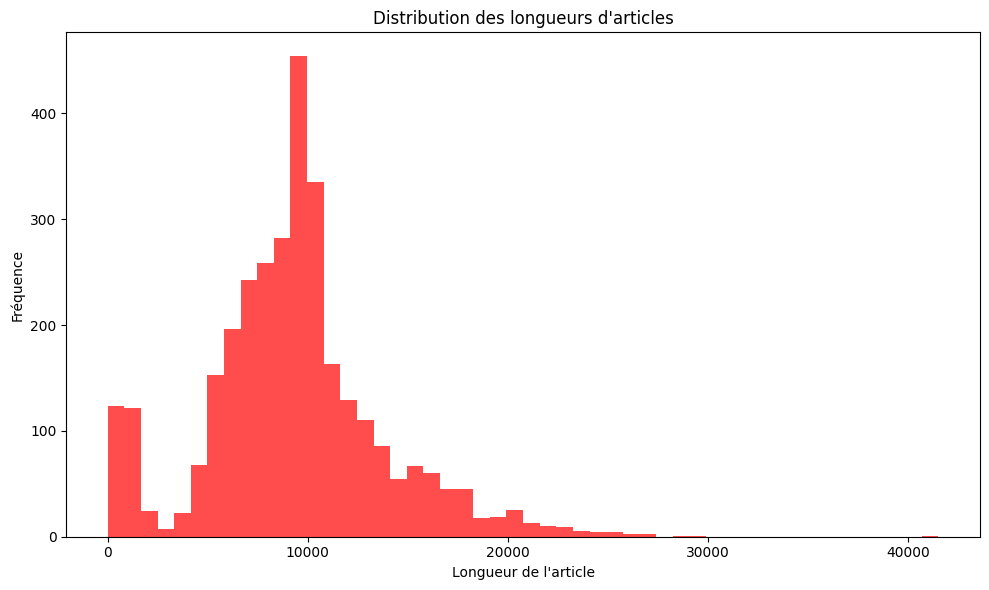

In [4]:
data['full_text_length'] = data['full_text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
data['full_text_length'].plot(kind='hist', bins=50, color='r', alpha=0.7)
plt.title("Distribution des longueurs d'articles")
plt.xlabel("Longueur de l'article")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()


In [5]:
stop_words = set(stopwords.words('russian'))
custom_stopwords = {
    "это", "день", "году", "например", "ещё", "время", "года", "год", "лет", "назад",
    "один", "первый", "именно", "также", "другой", "сегодня", "весь", "свой", "более",
    "очень", "таким", "просто", "всё", "часть", "затем", "хотя", "однако", "поскольку",
    "поэтому", "вместе", "вскоре", "позже", "кроме", "несмотря", "практически", "вроде", "вообще",
    "точно", "вполне", "весьма", "наконец", "лишь", "уже", "ещё", "тоже", "далее",
    "который", "которая", "которые", "которого", "которую", "которым", "которых", "котором", "которой",
    "которых", "которыми", "которым", "которую", "которого", "которое", "которые", "которых",
    "тот", "та", "то", "те", "этот", "эта", "это", "эти", "свой", "своя", "своё", "свои",
    "стал", "стала", "стали", "становится", "становился",
    "получил", "получила", "получили", "оказался", "оказалась", "оказались", "мог", "могла", "могли",
    "имел", "имела", "имели", "имеет", "имеют", "должен", "должна", "должны", "является", "являлся",
    "сказал", "заявил", "писал", "говорит", "говорил", "сказала","её","несколько", "результате", 
    "правда", "жизни", "роли", "времени", "момент", "дело", "людей", "среди"
}
stop_words = stop_words.union(custom_stopwords)


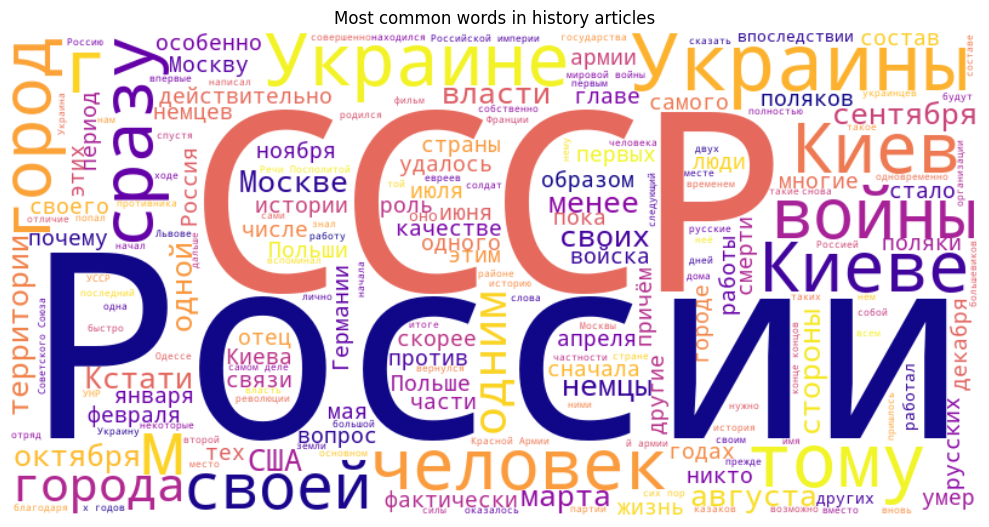

In [ ]:

all_abstracts = ' '.join(data['full_text'].dropna())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words,
    colormap='plasma',
).generate(all_abstracts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most common words in history articles")
plt.tight_layout()
plt.show()


In [ ]:
more_stopwords = {
    "зеленский", "зеленского", "зеленскому", "зеленским", "зеленском",
    "владимир", "владимира", "владимиру", "владимиром", "владимире",
    "президент", "президента", "президентом", "президенту", "президенте",
    "украина", "украины", "украине", "украину", "украиной", "украинского", "украинских",
    "января", "февраля", "марта", "апреля", "мая", "июня", "июля", "августа", "сентября",
    "октября", "ноября", "декабря",
    "однако", "хотя", "также", "вполне", "например", "другой", "глава", "сказал", "заявил",
    "государство", "страны", "команда", "слова", "своего", "своей", "таким", "который", "которая"
}
stop_words.update(more_stopwords)

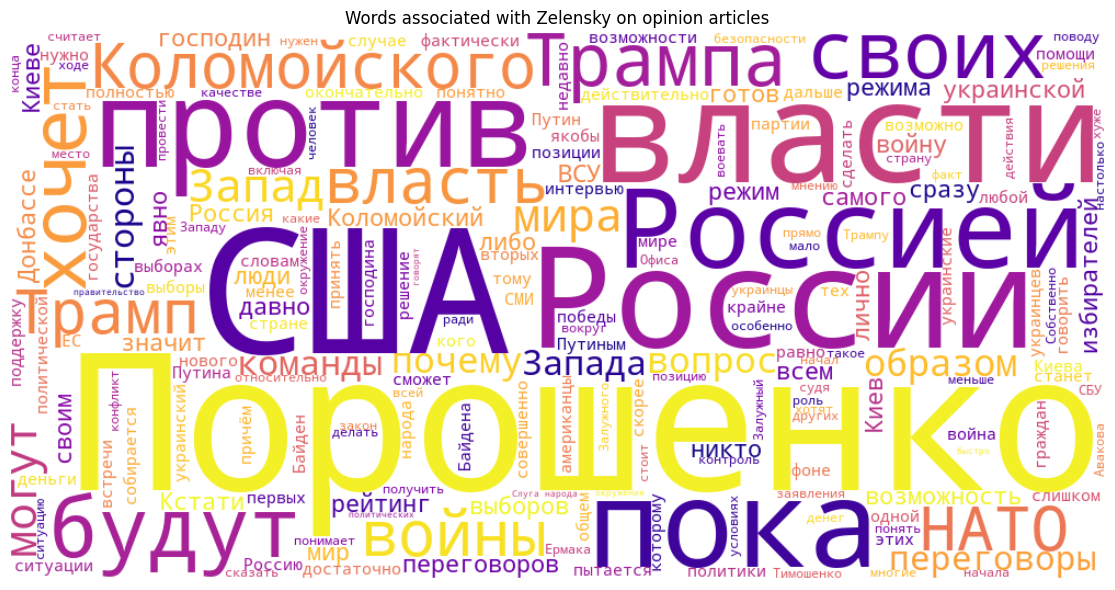

In [ ]:
zelensky_sentences = []

for text in data_opinion['full_text'].dropna():
    for sent in re.split(r'[.!?…]', text):
        if re.search(r'зеленск', sent, flags=re.IGNORECASE):
            zelensky_sentences.append(sent.strip())

text_zelensky = ' '.join(zelensky_sentences)
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=stop_words,
    colormap='plasma',
).generate(text_zelensky)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Words associated with Zelensky on opinion articles")
plt.tight_layout()
plt.show()


In [12]:
patterns_1 = {
    'Collective West': r"(коллективн[а-я]*\s+запад[а-я]*|\bзапад[а-я]*\b.*\bколлективн[а-я]*|\bколлективн[а-я]*\b.*\bзапад[а-я]*)",
    'Russophobia': r"\bрусофоб[а-я]*\b",
    'Neo-Nazism': r"\bнеонацист[а-я]*\b|\bнеонацизм[а-я]*\b",
    'Western Propaganda': r"(западн\w*\s+пропаганд|\bпропаганд\b.*\bзападн\w*)"
}

patterns_2 = {
    'Demilitarization': r"\bдемилитаризац[а-я]*\b",
    'Denazification': r"\bденацификац[а-я]*\b",
    'Liberation': r"\bосвобожд[а-я]*\b"
}


C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_4220\1077687023.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data[f'{label}_match'] = data['full_text'].str.contains(pattern, flags=re.IGNORECASE, regex=True)


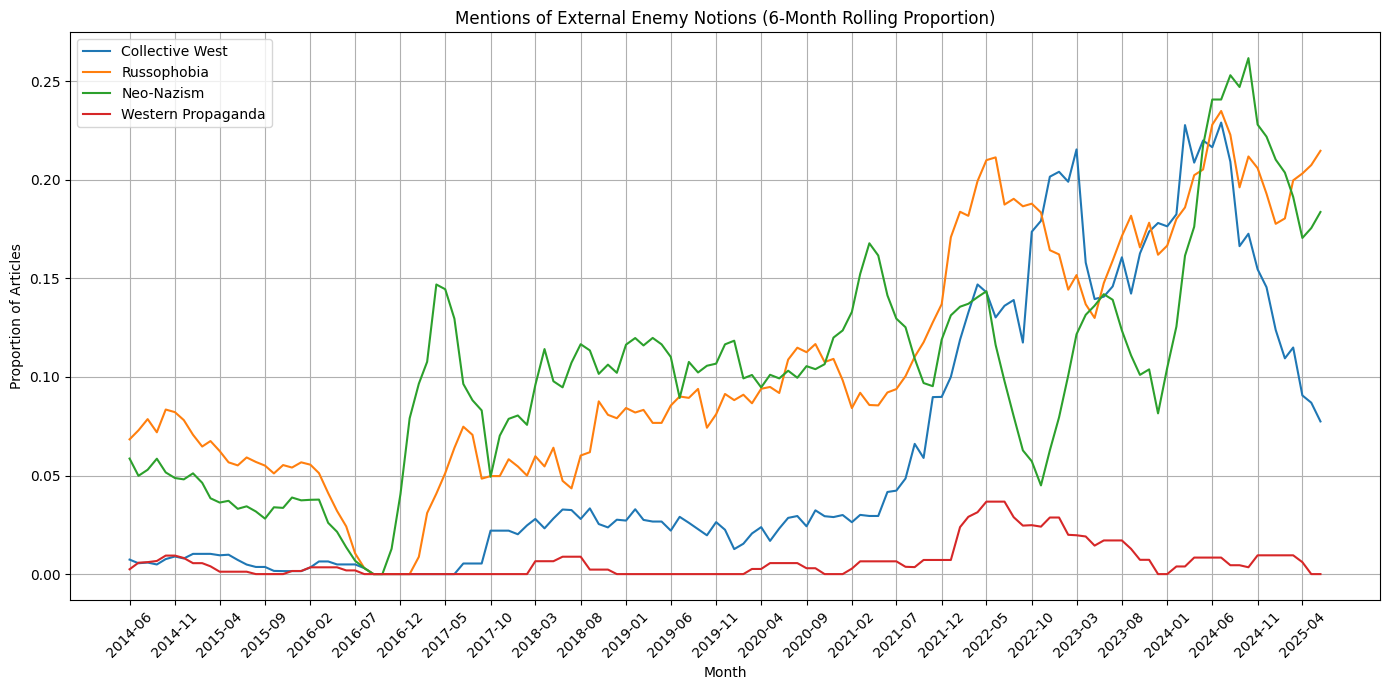

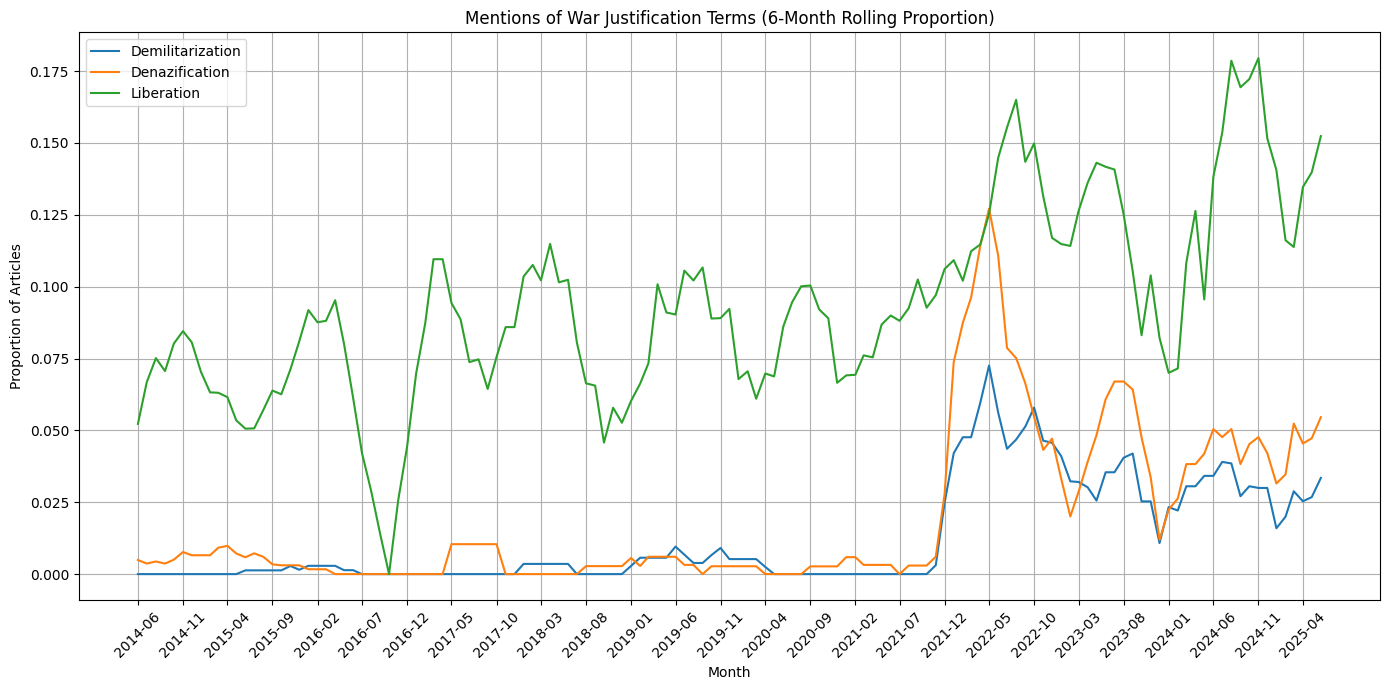

In [13]:
data_opinion['month'] = data_opinion['date_parsed'].dt.to_period('M').dt.to_timestamp()

def plot_rolling_mentions(data, patterns, title):
    # Calculate the total number of articles per month
    total_per_month = data.groupby('month')['full_text'].count().sort_index()

    for label, pattern in patterns.items():
        # Create a column indicating whether the pattern matches
        data[f'{label}_match'] = data['full_text'].str.contains(pattern, flags=re.IGNORECASE, regex=True)

    # Calculate proportions for each pattern
    monthly_props = {
        label: (data.groupby('month')[f'{label}_match'].sum().sort_index() / total_per_month)
        for label in patterns.keys()
    }

    plt.figure(figsize=(14, 7))
    for label, series in monthly_props.items():
        # Apply rolling average for smoothing
        smoothed = series.rolling(window=6, center=True, min_periods=1).mean()
        plt.plot(smoothed.index, smoothed.values, label=label)

    # Set x-axis ticks
    xticks_idx = np.arange(0, len(smoothed.index), 5)
    plt.xticks(ticks=smoothed.index[xticks_idx], labels=smoothed.index[xticks_idx].strftime('%Y-%m'), rotation=45)

    plt.title(title)
    plt.xlabel("Month")
    plt.ylabel("Proportion of Articles")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_rolling_mentions(data_opinion, patterns_1, "Mentions of External Enemy Notions (6-Month Rolling Proportion)")
plot_rolling_mentions(data_opinion, patterns_2, "Mentions of War Justification Terms (6-Month Rolling Proportion)")

In [19]:
data.head()

,abstract,full_text,tags,views,author,date_parsed,title,url,year_month
0,10 июня 1968 года состоялась премьера фильма К...,Почему украинские чиновники разрешили снимать ...,"[История, История, история СССР, история Украи...",442,Алексей Стаценко,2025-06-11 16:00:00,"""На Киевском направлении"" – единственный фильм...",https://ukraina.ru/20250610/na-kievskom-naprav...,2025-06
1,Дед Панас - легенда Советской Украины. Он боле...,"Прежде всего никакой он не Панас, и даже не Пё...","[История, История, Украина, телевидение, культ...",20607,Василий Стоякин,2025-06-11 08:00:00,"«Добрий вечiр, вам, малята, любi хлопчики й дi...",https://ukraina.ru/20250610/1023859046.html,2025-06
2,"Тридцать лет назад вряд ли кто-то предполагал,...",9 июня 1995 года президенты Леонид Кучма и Бор...,"[История, История, история Украины, Крым, Сева...",9207,Евгений Антонюк,2025-06-10 16:03:00,Мы делили... Черноморский флот,https://ukraina.ru/20250609/1046887656.html,2025-06
3,Король Владислав IV Ваза сыграл важнейшую роль...,"Современная украинская историография, весьма м...","[История, История, история Украины, Польша, Ре...",2968,Василий Стоякин,2025-06-10 08:00:00,"Король, который не смог стать царём. 430 лет В...",https://ukraina.ru/20250609/1043531930.html,2025-06
4,"Таких выдающихся специалистов, каким был уроже...","Природные способности, помноженные на возможно...","[История, История, Великая Отечественная война...",12799,Дмитрий Заборин,2025-06-08 16:22:00,Американский счёт Ивана Кожедуба,https://ukraina.ru/20250608/1033029162.html,2025-06


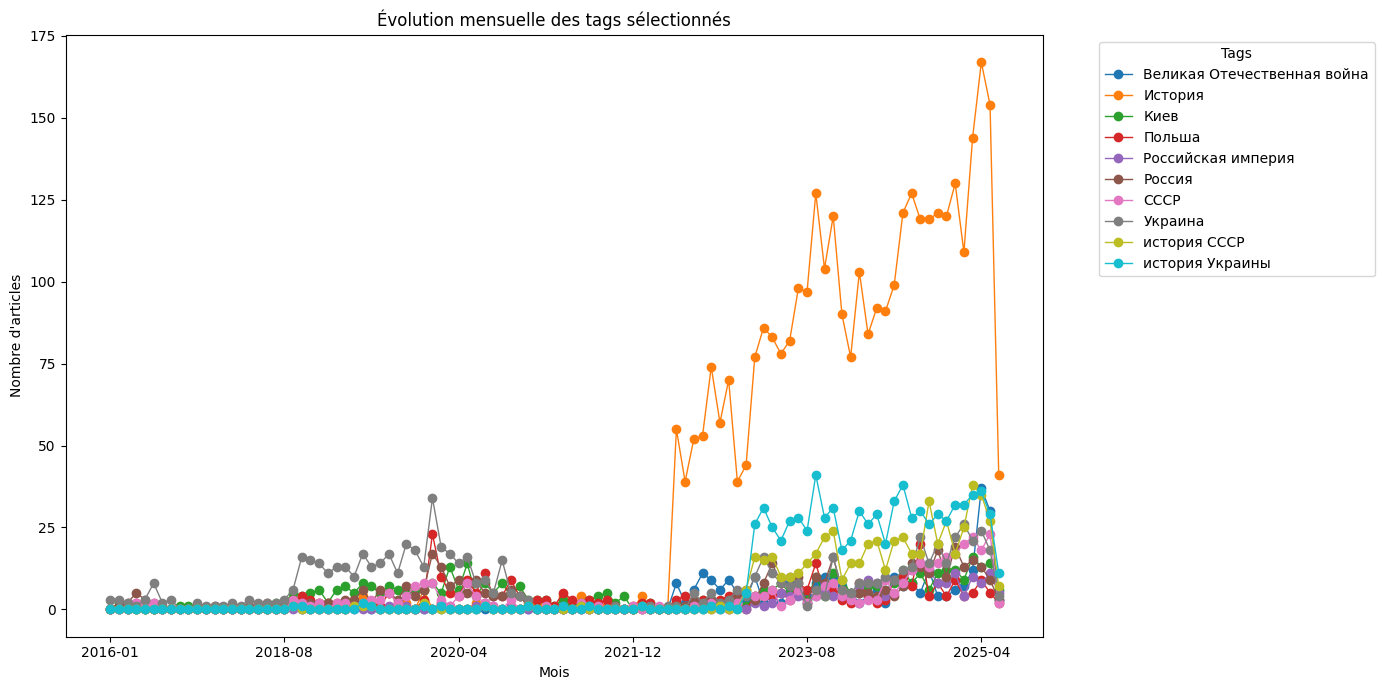

In [15]:
all_tags = [tag for tags in data['tags'] if isinstance(tags, list) for tag in tags]
tag_counts = Counter(all_tags)
frequent_tags = [tag for tag, count in tag_counts.items() if count > 200]
tags_to_track = frequent_tags
df_exploded = data.explode('tags')
tag_counts = Counter(df_exploded['tags'].dropna())
df_filtered = df_exploded[df_exploded['tags'].isin(tags_to_track)].copy()
df_filtered['date_parsed'] = pd.to_datetime(df_filtered['date_parsed'], errors='coerce')
df_filtered['month'] = df_filtered['date_parsed'].dt.to_period('M').astype(str)
counts = df_filtered.groupby(['month', 'tags']).size().unstack(fill_value=0)
counts = counts.astype(int)

counts.plot(figsize=(14,7), marker='o', linewidth=1)
plt.title("Évolution mensuelle des tags sélectionnés")
plt.xlabel("Mois")
plt.ylabel("Nombre d'articles")
plt.legend(title='Tags', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


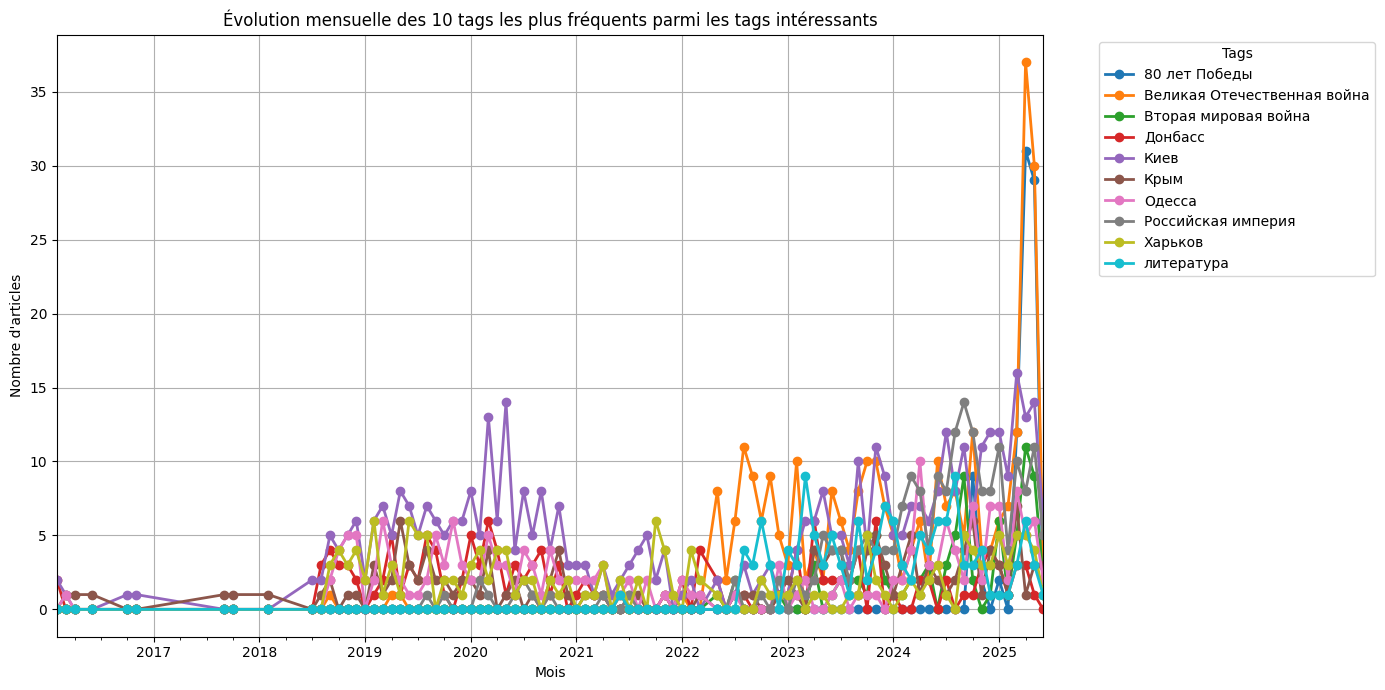

In [ ]:
interesting_tags = [
    # Conflits et opérations militaires
    "Азов", "АТО", "Донбасс", "ДНР", "ЛНР", "СВО", "военная техника", "война",
    "вооруженные силы Украины", "ВС РФ", "ГРУ", "ВДВ", "ВСУ", "Талибан", "Харьков",
    "Мариуполь", "Крым", "Крымская война", "Крымский мост",

    # Personnalités politiques et militaires
    "Владимир Путин", "Владимир Зеленский", "Алексей Арестович", "Василий Залужный",
    "Дмитрий Медведев", "Петр Порошенко", "Александр Лукашенко", "Анатолий Антонов",
    "Сергей Лавров", "Игорь Стрелков",

    # Dates et événements historiques clés
    "2014", "2022", "22 февраля 2014", "22 июня 1941 года", "80 лет Победы",
    "Великая Отечественная война", "Майдан", "Вторая мировая война",

    # Institutions et organisations
    "НАТО", "ООН", "МИД РФ", "СБУ", "ГРУ", "Рада", "Госдума", "РФ",
    "Украина-ЕС", "Украина-НАТО", "Российская империя",

    # Concepts liés à la propagande et la guerre de l'information
    "дезинформация", "пропаганда", "фейк", "информационная война", "цензура",
    "интернет", "социальные сети", "Вконтакте", "Telegram", "Youtube",

    # Régions et villes stratégiques
    "Киев", "Донецк", "Луганск", "Харьковская область", "Запорожье", "Одесса",
    "Мариуполь", "Крым", "Крымская АЭС",

    # Sujets sociétaux et culturels
    "история", "национализм", "патриотизм", "русский мир", "украинский язык",
    "русская культура", "литература", "религия", "православие"
]

# Exploser les tags
df_exploded = data.explode('tags')

# Filtrer pour garder seulement les tags d'intérêt présents dans les données
df_interesting = df_exploded[df_exploded['tags'].isin(interesting_tags)].copy()

# Compter la fréquence des tags d'intérêt
tag_counts = Counter(df_interesting['tags'].dropna())

# Prendre les 10 tags les plus fréquents parmi les intéressants
top_10_tags = [tag for tag, count in tag_counts.most_common(10)]

# Filtrer de nouveau pour ne garder que ces top 10
df_top = df_interesting[df_interesting['tags'].isin(top_10_tags)].copy()

# Conversion date en datetime et extraction du mois
df_top['date_parsed'] = pd.to_datetime(df_top['date_parsed'], errors='coerce')
df_top['month'] = df_top['date_parsed'].dt.to_period('M')

# Grouper et compter par mois et tag
counts = df_top.groupby(['month', 'tags']).size().unstack().fillna(0)

# Tracer
counts.plot(
    kind='line',
    figsize=(14, 7),
    marker='o',
    linewidth=2,
    colormap='tab10'
)
plt.title("Évolution mensuelle des 10 tags les plus fréquents parmi les tags intéressants")
plt.xlabel("Mois")
plt.ylabel("Nombre d'articles")
plt.legend(title='Tags', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


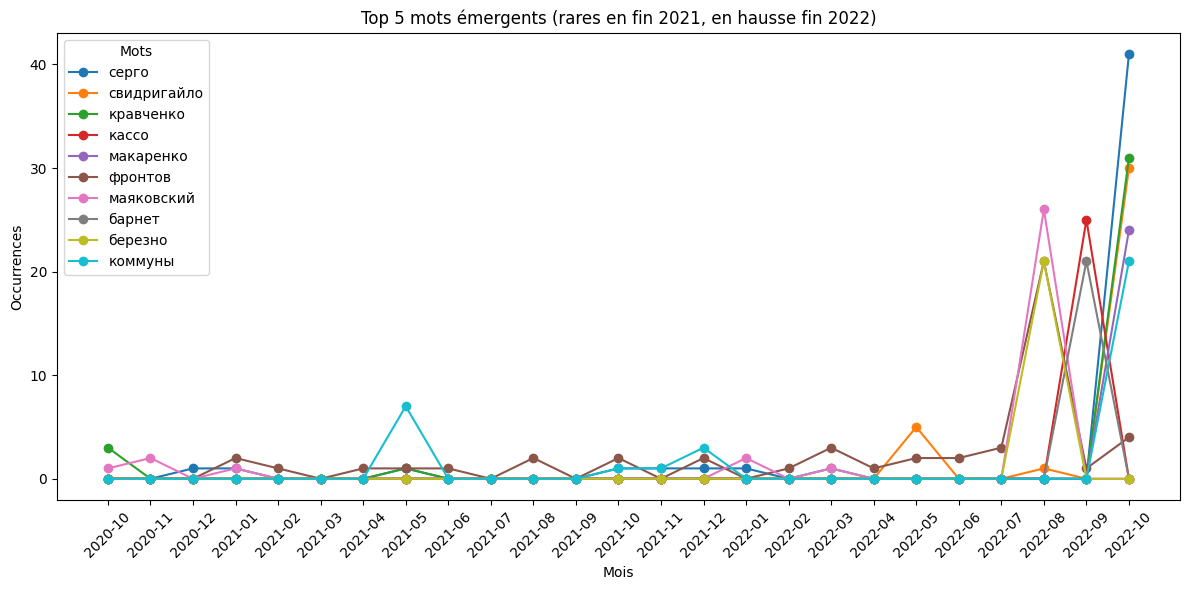

In [20]:
# Stopwords (comme avant)
stop_words = set(stopwords.words('russian')).union({
    "это", "день", "году", "например", "ещё",
    "время", "года", "который", "год", "лет", "назад",
    "один", "первый", "именно", "также", "другой", "сегодня",
    "весь", "свой", "более", "очень", "таким", "просто", "всё", "часть"
})

# 1. Nettoyer et convertir date_parsed en datetime si pas déjà fait
data['date_parsed'] = pd.to_datetime(data['date_parsed'], errors='coerce')

# 2. Filtrer uniquement les données entre octobre 2021 et octobre 2022
mask = (data['date_parsed'] >= '2020-10-01') & (data['date_parsed'] <= '2022-10-31')
df_filtered = data.loc[mask].copy()

# 3. Extraire year_month sous forme string 'YYYY-MM'
df_filtered['year_month'] = df_filtered['date_parsed'].dt.to_period('M').astype(str)

# 4. Tokenisation avec suppression des stopwords
def tokenize(text):
    if not isinstance(text, str):
        return []
    words = re.findall(r'\b\w+\b', text.lower())
    return [w for w in words if w not in stop_words]

df_filtered['tokens'] = df_filtered['full_text'].apply(tokenize)

# 5. Exploser les tokens
df_exploded = df_filtered.explode('tokens')

# 6. Calculer la fréquence par mot et par mois
freqs = df_exploded.groupby(['year_month', 'tokens']).size().unstack(fill_value=0)

# 7. Définir périodes initiale et finale
periode_initiale = ['2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03']
periode_finale = ['2022-08', '2022-09', '2022-10']

# 8. Somme des fréquences par période
freq_initiale = freqs.loc[periode_initiale].sum()
freq_finale = freqs.loc[periode_finale].sum()

# 9. Sélectionner mots rares au départ (<= 2) mais avec forte hausse (>10)
emergent_candidates = freq_finale[(freq_initiale <= 5) & (freq_finale > 10)]

# 10. Garder top 5 selon augmentation (différence)
top_emergent = (freq_finale - freq_initiale).loc[emergent_candidates.index].sort_values(ascending=False).head(10)

# 11. Extraire les données pour ces mots
freqs_top = freqs[top_emergent.index]

# 12. Tracer
plt.figure(figsize=(12,6))
for word in freqs_top.columns:
    plt.plot(freqs_top.index, freqs_top[word], marker='o', label=word)

plt.title("Top 5 mots émergents (rares en fin 2021, en hausse fin 2022)")
plt.xlabel("Mois")
plt.ylabel("Occurrences")
plt.xticks(rotation=45)
plt.legend(title="Mots")
plt.tight_layout()
plt.show()

['Алексей  Стаценко', 'Василий  Стоякин', 'Олег Хавич', 'Евгений  Антонюк', 'Игорь  Иваненко', 'Дмитрий Губин', 'Олег Измайлов', 'Дмитрий Заборин', 'Александр Васильев', 'Александр Чаусов']


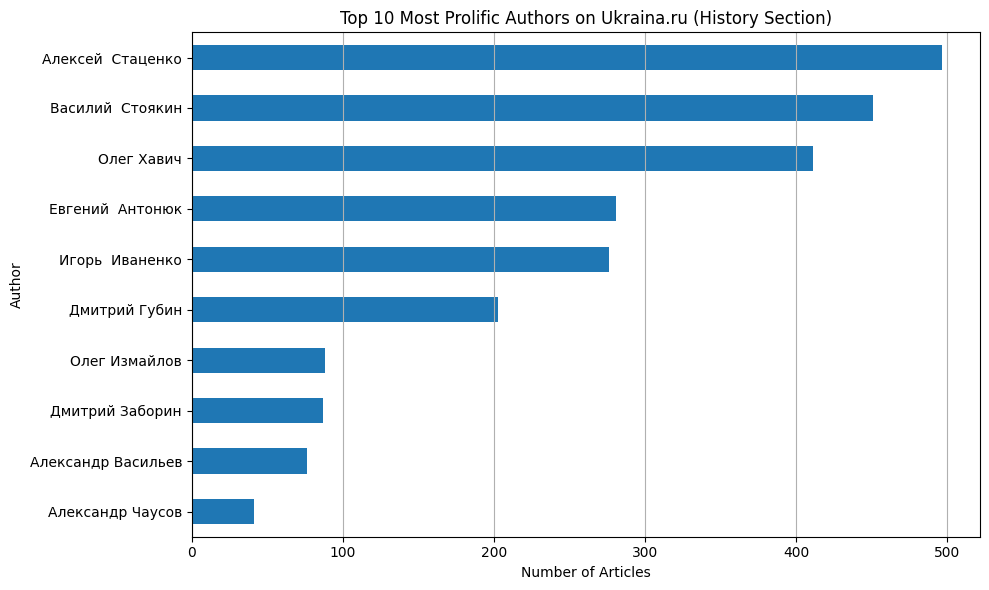

In [ ]:
author_counts = data['author'].value_counts()

top_authors = author_counts.head(10)
top_10_authors = author_counts.head(10).index.tolist()
print(top_10_authors)

plt.figure(figsize=(10, 6))
top_authors.plot(kind='barh')
plt.title("Top 10 Most Prolific Authors on Ukraina.ru (History Section)")
plt.xlabel("Number of Articles")
plt.ylabel("Author")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

['Ростислав Ищенко', 'Константин Кеворкян', 'Андрей  Манчук', 'Андрей Бабицкий', 'Василий  Стоякин', 'Владимир Скачко', 'Дмитрий Выдрин', 'Свободная Пресса', 'Павел Рудяков', 'Руслан  Мармазов']


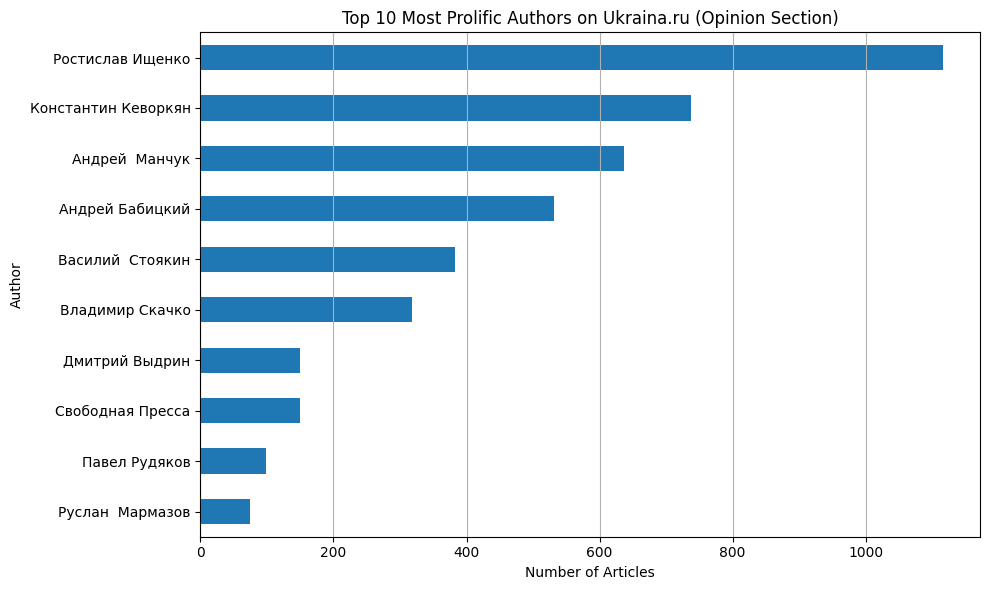

In [ ]:
author_counts = data_opinion['author'].value_counts()

top_authors = author_counts.head(10)
top_10_authors = author_counts.head(10).index.tolist()
print(top_10_authors)

plt.figure(figsize=(10, 6))
top_authors.plot(kind='barh')
plt.title("Top 10 Most Prolific Authors on Ukraina.ru (Opinion Section)")
plt.xlabel("Number of Articles")
plt.ylabel("Author")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [27]:
data.head()

,abstract,full_text,tags,views,author,date_parsed,title,url,year_month
0,10 июня 1968 года состоялась премьера фильма К...,Почему украинские чиновники разрешили снимать ...,"[История, История, история СССР, история Украи...",442,Алексей Стаценко,2025-06-11 16:00:00,"""На Киевском направлении"" – единственный фильм...",https://ukraina.ru/20250610/na-kievskom-naprav...,2025-06
1,Дед Панас - легенда Советской Украины. Он боле...,"Прежде всего никакой он не Панас, и даже не Пё...","[История, История, Украина, телевидение, культ...",20607,Василий Стоякин,2025-06-11 08:00:00,"«Добрий вечiр, вам, малята, любi хлопчики й дi...",https://ukraina.ru/20250610/1023859046.html,2025-06
2,"Тридцать лет назад вряд ли кто-то предполагал,...",9 июня 1995 года президенты Леонид Кучма и Бор...,"[История, История, история Украины, Крым, Сева...",9207,Евгений Антонюк,2025-06-10 16:03:00,Мы делили... Черноморский флот,https://ukraina.ru/20250609/1046887656.html,2025-06
3,Король Владислав IV Ваза сыграл важнейшую роль...,"Современная украинская историография, весьма м...","[История, История, история Украины, Польша, Ре...",2968,Василий Стоякин,2025-06-10 08:00:00,"Король, который не смог стать царём. 430 лет В...",https://ukraina.ru/20250609/1043531930.html,2025-06
4,"Таких выдающихся специалистов, каким был уроже...","Природные способности, помноженные на возможно...","[История, История, Великая Отечественная война...",12799,Дмитрий Заборин,2025-06-08 16:22:00,Американский счёт Ивана Кожедуба,https://ukraina.ru/20250608/1033029162.html,2025-06


In [ ]:
data_historia = data.copy()

pattern = re.compile(r'булгаков', flags=re.I)

hist_bulg = data_historia[data_historia['full_text'].str.contains(pattern) | data_historia['abstract'].str.contains(pattern)]
opin_bulg = data_opinion[data_opinion['full_text'].str.contains(pattern) | data_opinion['abstract'].str.contains(pattern)]

bulg_all = pd.concat([hist_bulg, opin_bulg], ignore_index=True)

<Axes: title={'center': 'Bulgakov mentions per month'}, xlabel='date_parsed'>

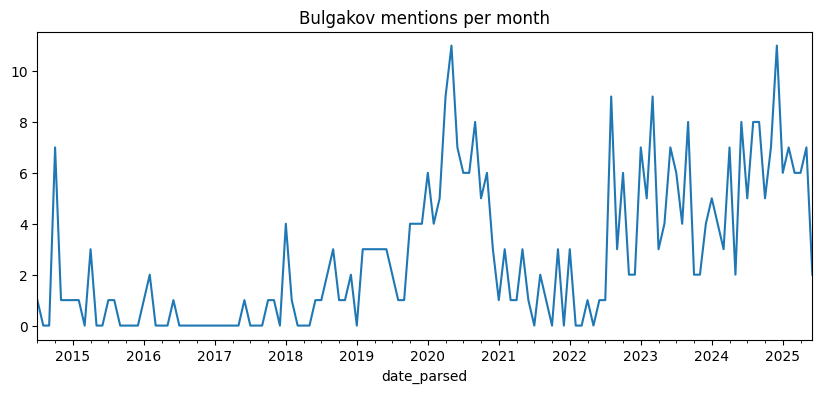

In [32]:
ts = (
    bulg_all
    .set_index('date_parsed')
    .resample('M')
    .size()
    .rename('mentions')
)
ts.plot(figsize=(10,4), title='Bulgakov mentions per month')

In [ ]:
pattern = re.compile(r'булгаков', flags=re.I)
window = 40
samples = []

for text in bulg_all['full_text'].head(25):
    for m in re.finditer(pattern, text):
        start = max(m.start() - window, 0)
        end = min(m.end() + window, len(text))
        samples.append(text[start:end].replace('\n', ' '))

for s in samples:
    print('…' + s + '…\n')


…кого замысла.  Есть мнение, что если бы Булгаков прожил ещё, то он внёс бы ещё какие-то …

… закончится так или другая недописанная Булгаковым линия, но единственный путь это прояс…

…ерсии, которые до нас просто не дошли – Булгаков минимум дважды сжигал тексты романа.  В…

… жизни книжный червь (нехарактерная для Булгакова злая сатира на интеллигенцию, заставля…

…читает, что эта редакция была полностью Булгаковым уничтожена (о чём он писал в 1930 год…

…ргеевна Бокшанская – родная сестра Е.С. Булгаковой и секретарь В.И. Немировича-Данченко …

…Немировича-Данченко (надо отметить, что Булгаков не любил обоих, но уважал профессиональ…

…версию в отдельную редакцию? Затем, что Булгаков знал свою манеру работы – он же не прос…

… июня в Гатчине под Петербургом Василий Булгаков взлетел на биплане конструкции Якова Га…

…омых Паустовского был, например, Михаил Булгаков, о котором он оставил отрывочные, но до…

…удничали Алексей Новиков-Прибой, Михаил Булгаков, Валентин Катаев и другие.  В 

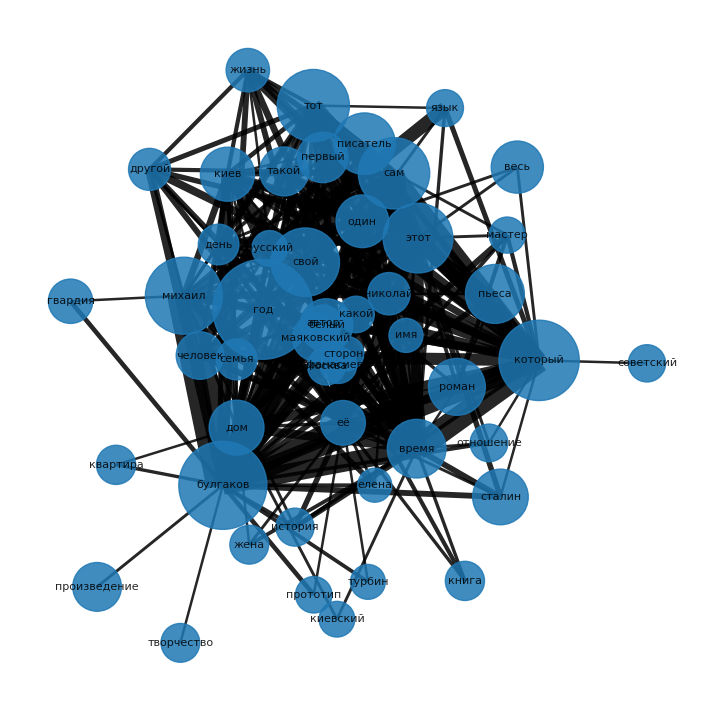

In [45]:
import pymorphy2, re, itertools, networkx as nx, matplotlib.pyplot as plt
from collections import Counter

morph = pymorphy2.MorphAnalyzer()

def lemmas(text):
    words = re.findall(r'[а-яёА-ЯЁ]+', text)
    return [
        p.normal_form for w in words
        if (p := morph.parse(w)[0]).tag.POS in {'NOUN', 'ADJF', 'PRTF', 'Name'}
    ]

ctx = []
for text in bulg_all['full_text']:
    t = lemmas(text)
    idxs = [i for i, w in enumerate(t) if w == 'булгаков']
    for i in idxs:
        ctx.extend(t[max(i-5, 0):i] + t[i+1:i+6])

freq = Counter(ctx).most_common(50)
G = nx.Graph()
for w, c in freq:
    if c > 10:
        G.add_node(w, size=c)

nodes = [w for w, c in freq if c > 10]
for w1, w2 in itertools.combinations(nodes, 2):
    co = sum(
        1 for text in bulg_all['full_text']
        if re.search(fr'\b{w1}\b.*\b{w2}\b|\b{w2}\b.*\b{w1}\b', text, flags=re.I)
    )
    if co > 5:
        G.add_edge(w1, w2, weight=co)

pos = nx.kamada_kawai_layout(G)
sizes = [G.nodes[n]['size'] * 15 for n in G]
widths = [G.edges[e]['weight'] * 0.3 for e in G.edges]

plt.figure(figsize=(9, 9))
nx.draw_networkx(G, pos, node_size=sizes, width=widths, font_size=8, alpha=0.85)
plt.axis('off')
plt.show()


In [ ]:
nltk.download('stopwords')
ru_stop = stopwords.words('russian') + [
    'год', 'года', 'году', 'лет', 'время', 'который', 'которые', 'которого',
    'которому', 'которые', 'которыми', 'которых', 'очень', 'всё', 'все',
    'её', 'его', 'нам', 'наш', 'наши', 'просто', 'однако'
]

vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words=ru_stop)
X = vectorizer.fit_transform(bulg_all['full_text'])
lda = LDA(n_components=10, random_state=0).fit(X)
terms = vectorizer.get_feature_names_out()

topics = []
for comp in lda.components_:
    idx = comp.argsort()[-15:][::-1]
    topics.append([terms[i] for i in idx])
for i, t in enumerate(topics, 1):
    print(f'Topic {i}:', ' | '.join(t))


[nltk_data] Downloading package stopwords to C:\Users\CYTech
[nltk_data]     Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1: фильм | роли | режиссёр | роль | съёмки | сценарий | кадре | режиссёра | зощенко | актёр | аркадий | актёра | предложил | стругацкие | съёмочной
Topic 2: булгаков | булгакова | писателей | горький | ещё | романе | действительно | автор | именно | ссср | тинченко | ильф | грибоедова | романа | либретто
Topic 3: булгакова | булгаков | жизни | михаил | киеве | именно | писателя | своей | стал | турбиных | дом | русской | михаила | кстати | киев
Topic 4: армии | ссср | булгаков | 1920 | го | войны | войска | против | генерал | россии | маяковский | город | войск | день | киев
Topic 5: украины | украине | россии | украина | украинской | украинского | украинских | власти | петлюра | украинский | сша | людей | сегодня | украинские | украину
Topic 6: также | стал | киеве | город | затем | образцов | коновальца | те | человек | киев | оун | территории | мая | именно | вскоре
Topic 7: булгаков | булгакова | именно | романа | кстати | ещё | правда | действительно | мастера | например | и

In [ ]:
flat = [w for topic in topics for w in topic]
common = {w for w, c in Counter(flat).items() if c > 3}

filtered = [[w for w in topic if w not in common][:10] for topic in topics]
for i, t in enumerate(filtered, 1):
    print(f'Topic {i}:', ' | '.join(t))


Topic 1: фильм | роли | режиссёр | роль | съёмки | сценарий | кадре | режиссёра | зощенко | актёр
Topic 2: булгакова | писателей | горький | ещё | романе | действительно | автор | ссср | тинченко | ильф
Topic 3: булгакова | жизни | михаил | киеве | писателя | своей | стал | турбиных | дом | русской
Topic 4: армии | ссср | 1920 | го | войны | войска | против | генерал | россии | маяковский
Topic 5: украины | украине | россии | украина | украинской | украинского | украинских | власти | петлюра | украинский
Topic 6: также | стал | киеве | город | затем | образцов | коновальца | те | человек | оун
Topic 7: булгакова | романа | кстати | ещё | правда | действительно | мастера | например | иешуа | хотя
Topic 8: армии | гетмана | генерал | скоропадский | 1918 | киеве | несколько | стал | 1917 | скоропадского
Topic 9: августа | церкви | армии | австро | армия | церковь | русские | русских | войска | также
Topic 10: дом | памятник | здание | дома | памятника | годах | паустовский | около | стиле

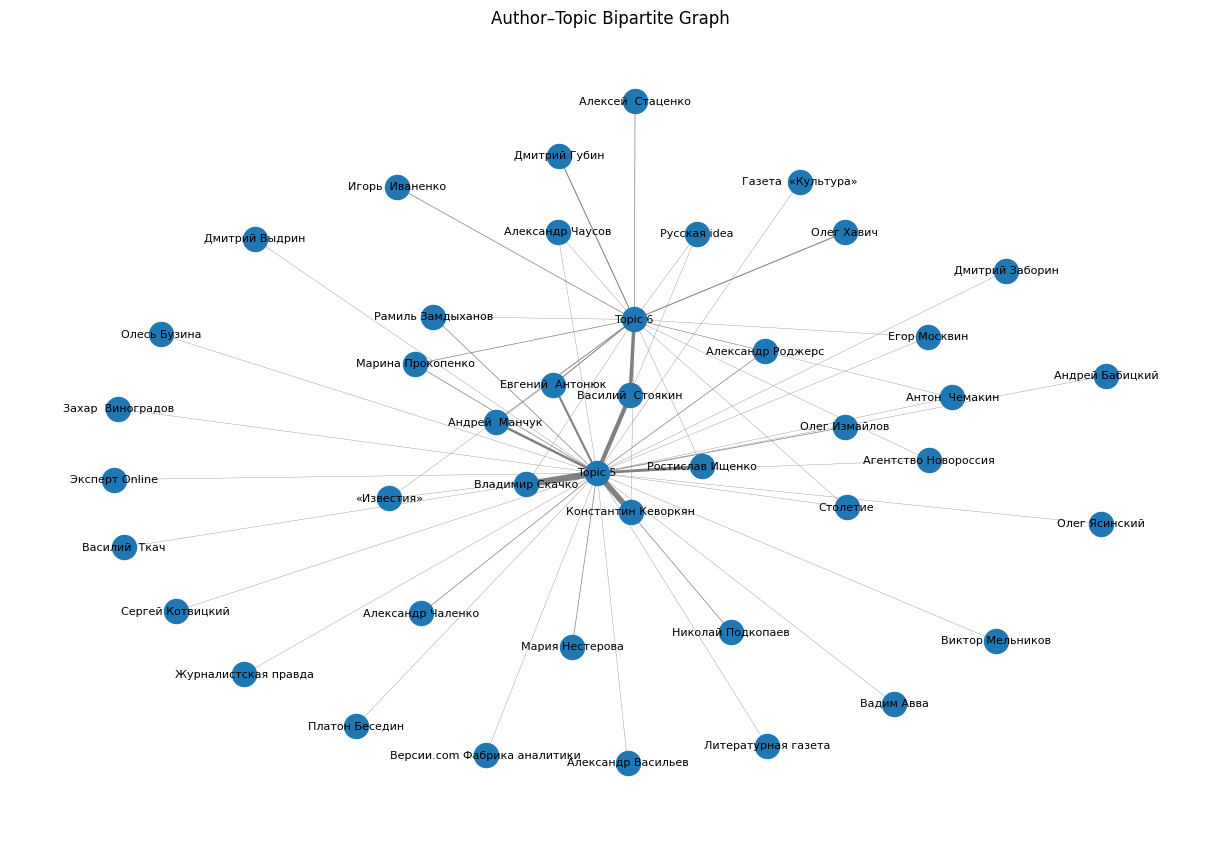

In [ ]:
mask = bulg_all['author'].notna()
authors = bulg_all.loc[mask, 'author'].values
topic_matrix_clean = topic_matrix[mask]

edges = defaultdict(int)
topic_ids = [5, 6]

for i, row in enumerate(topic_matrix_clean):
    for t in topic_ids:
        if row[t - 1] > 0.2:
            edges[(authors[i], f"Topic {t}")] += 1

G = nx.Graph()
for (a, t), w in edges.items():
    if a is not None and t is not None:
        G.add_node(a, bipartite=0)
        G.add_node(t, bipartite=1)
        G.add_edge(a, t, weight=w)

pos = nx.spring_layout(G, k=0.45, seed=42)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True,
        node_size=300, width=[G[u][v]['weight'] * 0.25 for u, v in G.edges()],
        edge_color='grey', font_size=8)
plt.title("Author–Topic Bipartite Graph")
plt.axis('off')
plt.show()


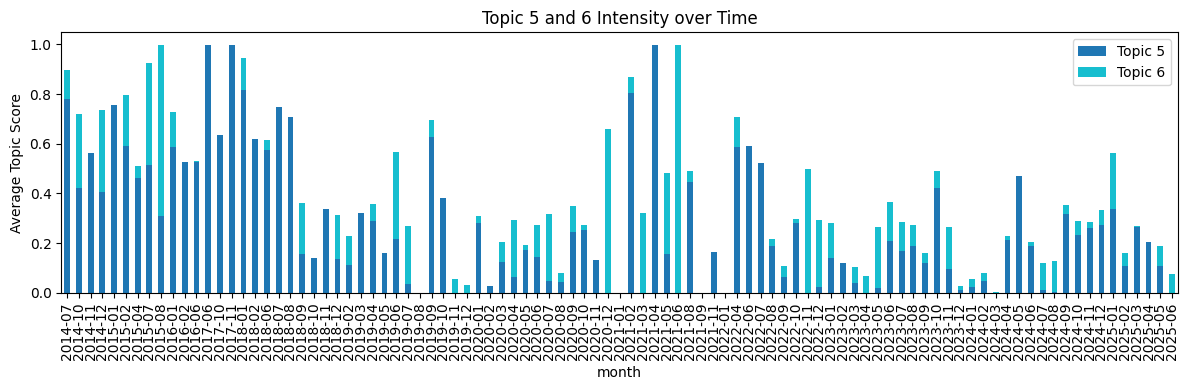

In [ ]:
tm = topic_matrix[:, [4, 5]]
dates = pd.to_datetime(bulg_all['date_parsed'])
months = dates.dt.to_period('M')
df_tm = pd.DataFrame(tm, columns=['Topic 5', 'Topic 6'])
df_tm['month'] = months

monthly = df_tm.groupby('month')[['Topic 5', 'Topic 6']].mean()

monthly.plot(kind='bar', stacked=True, figsize=(12,4), colormap='tab10',
             title='Topic 5 and 6 Intensity over Time')
plt.ylabel("Average Topic Score")
plt.tight_layout()
plt.show()


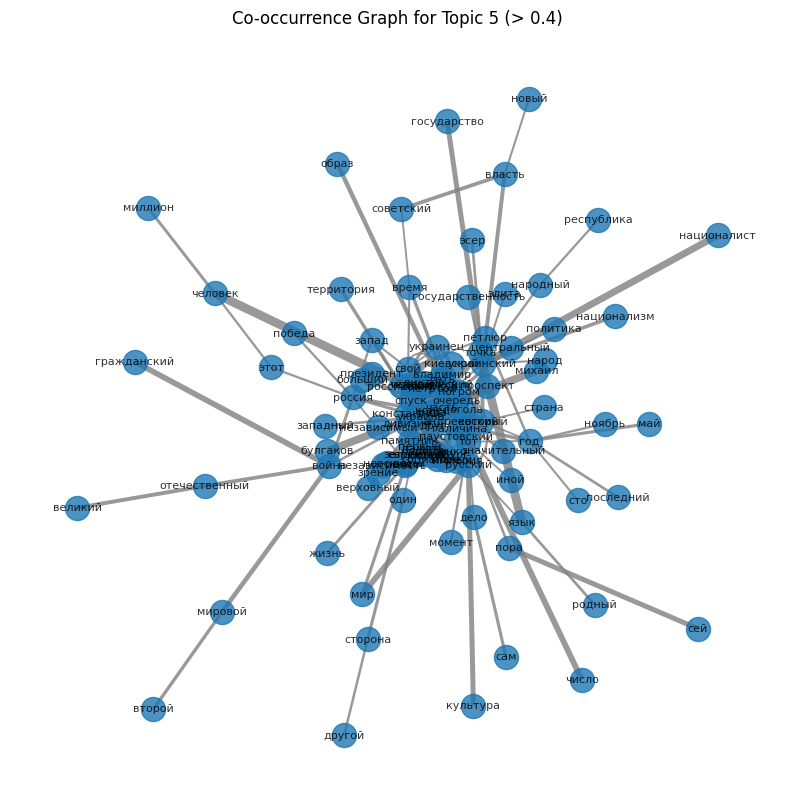

In [ ]:
topic_id = 4 
filtered_texts = bulg_all[topic_matrix[:, topic_id] > 0.4]['full_text']

def lemmatized_nouns(text):
    words = re.findall(r'[а-яёА-ЯЁ]+', text)
    return [
        p.normal_form for w in words
        if (p := morph.parse(w)[0]).tag.POS in {'NOUN', 'ADJF', 'Name'}
    ]

ctx = []
for txt in filtered_texts:
    t = lemmatized_nouns(txt)
    for i in range(len(t)-1):
        ctx.append((t[i], t[i+1]))

bigram_counts = Counter(ctx)
top_bigrams = [(a,b) for (a,b), c in bigram_counts.items() if c > 8]

G = nx.Graph()
for (a,b) in top_bigrams:
    G.add_edge(a, b, weight=bigram_counts[(a,b)])

pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, pos, 
                 node_size=300,
                 width=[G[e[0]][e[1]]['weight'] * 0.15 for e in G.edges()],
                 font_size=8, edge_color='grey', alpha=0.8)
plt.title("Co-occurrence Graph for Topic 5 (> 0.4)")
plt.axis('off')
plt.show()


<Axes: ylabel='author'>

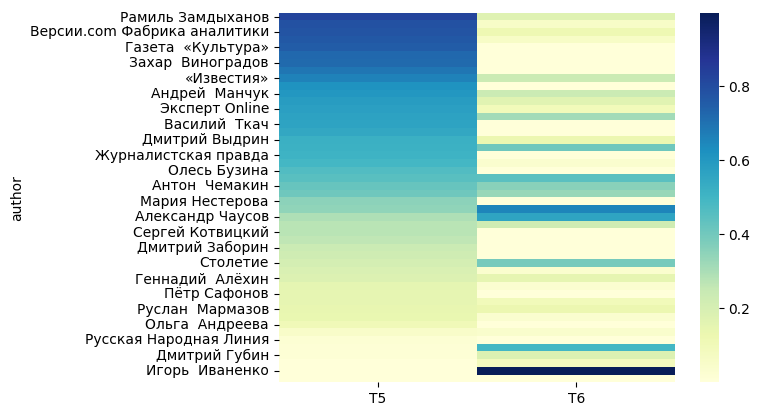

In [ ]:
top = pd.DataFrame(topic_matrix_clean, columns=[f'T{i+1}' for i in range(10)])
top['author'] = authors
pivot = top.groupby('author')[['T5','T6']].mean().sort_values('T5', ascending=False)
sns.heatmap(pivot, cmap='YlGnBu')
